In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
#Reading the file
data = pd.read_csv('D:\\CODSOFT\\titanicdata.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Cleaning Data

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data = data[data['Embarked'].notnull()]

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
data = data.drop(columns = 'Cabin', axis = 1)

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [9]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Visualiztion

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\additionalPackages\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

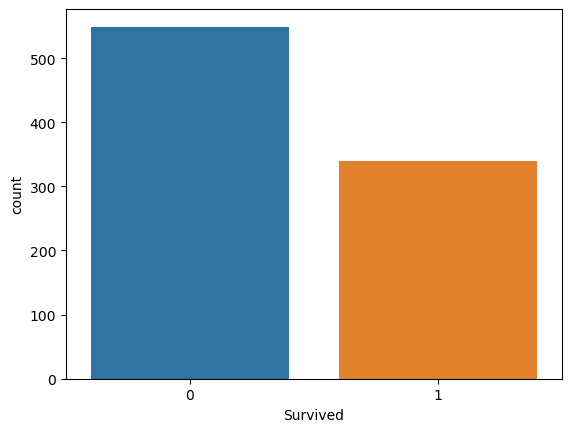

In [12]:
sns.countplot('Survived', data = data)

C:\additionalPackages\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

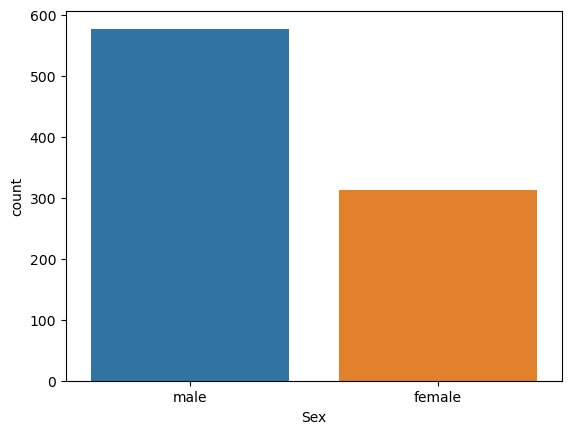

In [13]:
sns.countplot('Sex', data = data)

In [14]:
bar = data.groupby(['Pclass', 'Sex', 'Survived']).count()

In [15]:
bar

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex    Survived                                                       
1      female 0                   3     3    3      3      3       3     3   
              1                  89    89   89     89     89      89    89   
       male   0                  77    77   77     77     77      77    77   
              1                  45    45   45     45     45      45    45   
2      female 0                   6     6    6      6      6       6     6   
              1                  70    70   70     70     70      70    70   
       male   0                  91    91   91     91     91      91    91   
              1                  17    17   17     17     17      17    17   
3      female 0                  72    72   72     72     72      72    72   
              1                  72    72   72     72     72      72    72   
       male   0                 300   300  300    300    300     300   300   
              1                  47    47   47     47     47      47    47   

                        Embarked  
Pclass Sex    Survived            
1      female 0                3  
              1               89  
       male   0               77  
              1               45  
2      female 0                6  
              1               70  
       male   0               91  
              1               17  
3      female 0               72  
              1               72  
       male   0              300  
              1               47

In [16]:
bar = bar['PassengerId'].unstack()

Text(0.5, 1.0, 'Survival Number based on class and sex')

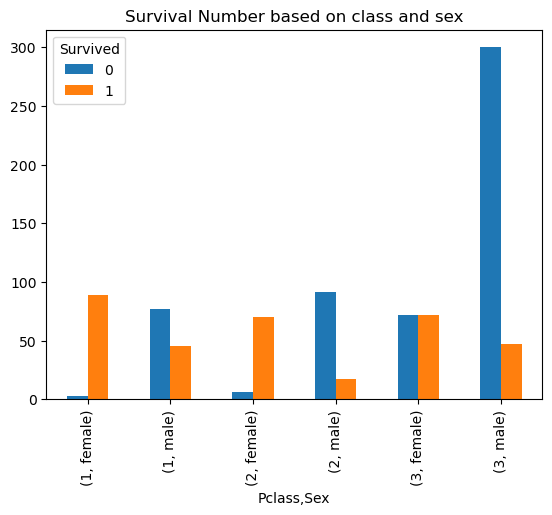

In [17]:
bar.plot(kind = 'bar')
plt.title('Survival Number based on class and sex')

In [18]:
## Training and Testing

In [19]:
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

In [20]:
data['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [21]:
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

In [22]:
data['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 889, dtype: int32

In [23]:
x = data.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket'], axis = 1)

In [24]:
y = data['Survived']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 2)

In [26]:
print(x.shape, x_train.shape, x_test.shape)

(889, 7) (622, 7) (267, 7)


In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
LR_model = LogisticRegression().fit(x_train,y_train)
LR_pred = LR_model.predict(x_test)
con = classification_report(y_test, LR_pred)
print(con)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       170
           1       0.78      0.75      0.77        97

    accuracy                           0.84       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.84      0.83       267



In [30]:

accuracy_score(y_test, LR_pred)


0.8352059925093633

## Prediction

In [34]:
x.iloc[450].values

array([ 3.       ,  1.       , 29.6420927,  1.       ,  0.       ,
       19.9667   ,  2.       ])

In [35]:
y[450]

0

In [36]:
values = pd.DataFrame(x.iloc[450].values.reshape(1,-1), columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
user_pred = LR_model.predict(values)
print(user_pred)

[0]
